
<h1 id="Final-Project:-Breast-Cancer-Data-Set">Final Project: Breast Cancer Data Set<a class="anchor-link" href="#Final-Project:-Breast-Cancer-Data-Set">¶</a></h1>



<h3 id="Imports">Imports<a class="anchor-link" href="#Imports">¶</a></h3>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline


<h3 id="Check-Filepath">Check Filepath<a class="anchor-link" href="#Check-Filepath">¶</a></h3>


In [2]:
import os
print(os.getcwd())

/Users/ajarnolie/personal-dev/ML-breast-cancer-diagnosis



<h3 id="Read-CSV-File">Read CSV File<a class="anchor-link" href="#Read-CSV-File">¶</a></h3>


In [3]:
cancerData = pd.read_csv('data.csv')
cancerData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



<h3 id="Format-and-Improve-Data">Format and Improve Data<a class="anchor-link" href="#Format-and-Improve-Data">¶</a></h3>


In [4]:
cancerData.drop('id', axis=1, inplace=True)
cancerData.drop('Unnamed: 32', axis=1, inplace=True)
cancerData['diagnosis'] = cancerData['diagnosis'].map({'M': 1, 'B': 0})
cancerData.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


<h3 id="Get-More-Info-on-Data">Get More Info on Data<a class="anchor-link" href="#Get-More-Info-on-Data">¶</a></h3>


In [5]:
cancerData.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500



<h3 id="Find-Possible-Trends">Find Possible Trends<a class="anchor-link" href="#Find-Possible-Trends">¶</a></h3>


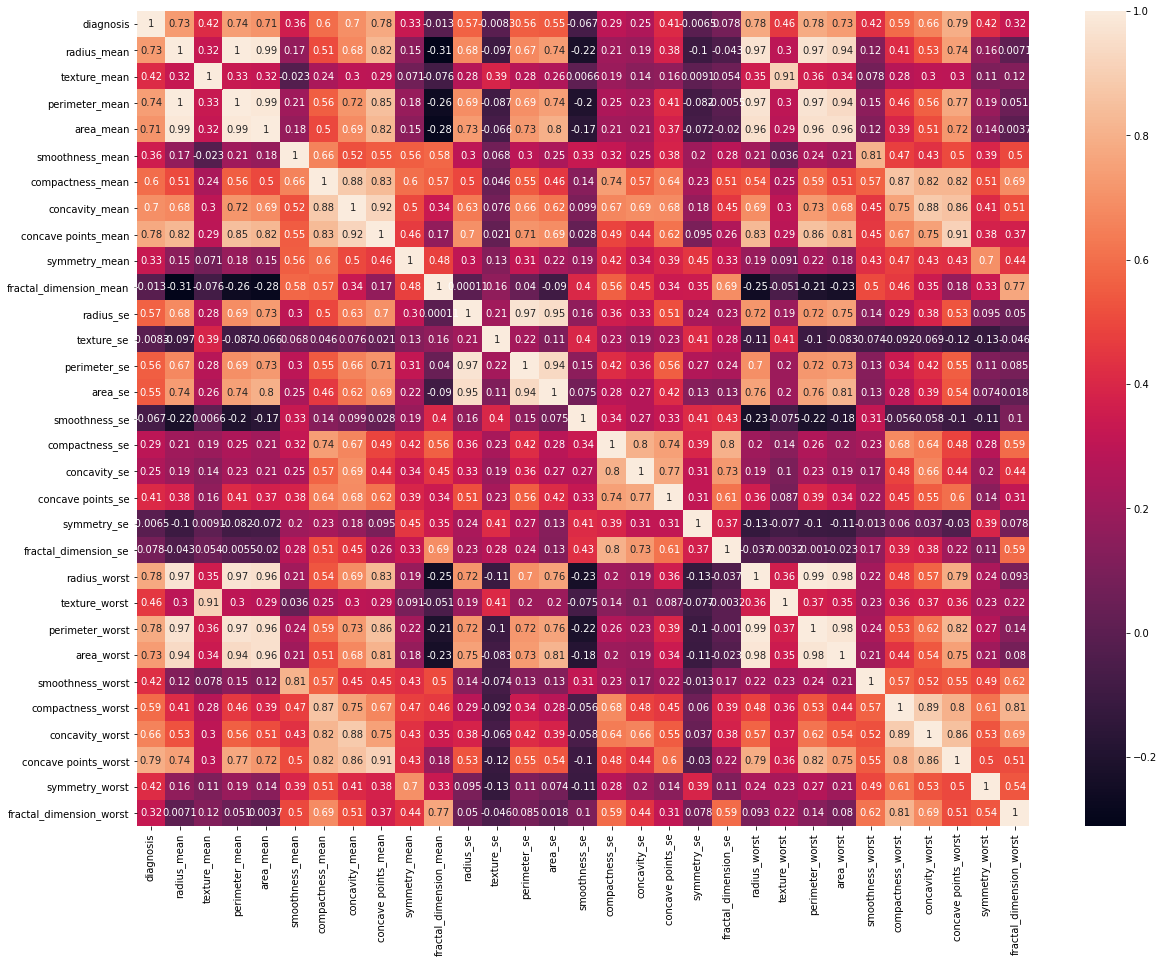

In [6]:
plt.subplots(figsize=(20,15))
graph = sns.heatmap(cancerData.corr(), xticklabels=1, yticklabels=1, annot=True)


<h2 id="4-Trends">4 Trends<a class="anchor-link" href="#4-Trends">¶</a></h2>



<h3 id="Concave-Points-vs.-Concavity">Concave Points vs. Concavity<a class="anchor-link" href="#Concave-Points-vs.-Concavity">¶</a></h3>


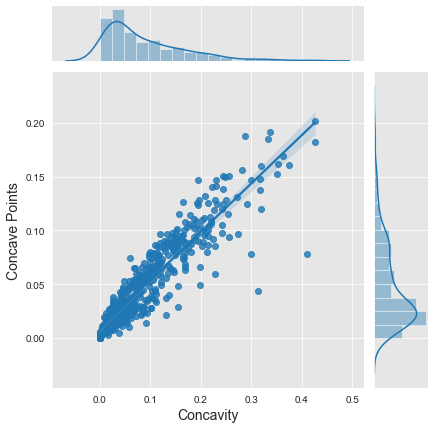

In [7]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
graph = sns.jointplot(y='concave points_mean',x='concavity_mean', data=cancerData, dropna=True, kind='reg')
graph.set_axis_labels('Concavity', 'Concave Points',fontsize=14)


<h3 id="Compactness-vs-Concave-Points">Compactness vs Concave Points<a class="anchor-link" href="#Compactness-vs-Concave-Points">¶</a></h3>


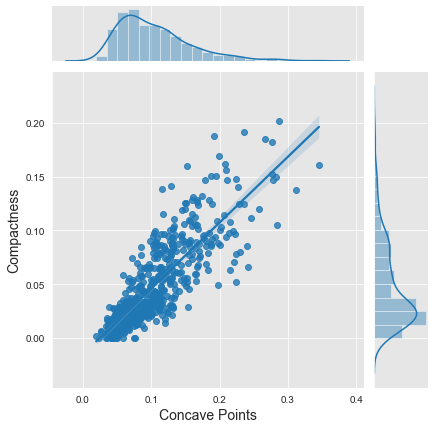

In [8]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
graph = sns.jointplot(y='concave points_mean',x='compactness_mean', data=cancerData, dropna=True, kind='reg')
graph.set_axis_labels('Concave Points', 'Compactness',fontsize=14)


<h3 id="Correlation-between-Concave-Points-and-the-Final-Diagnosis">Correlation between Concave Points and the Final Diagnosis<a class="anchor-link" href="#Correlation-between-Concave-Points-and-the-Final-Diagnosis">¶</a></h3>


Text(0, 0.5, 'Frequency')

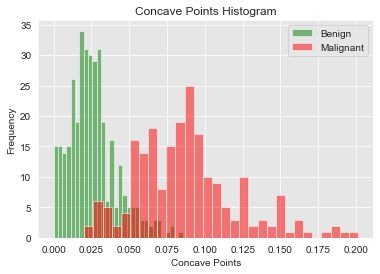

In [9]:
cancerData[cancerData['diagnosis']==0]['concave points_mean'].hist(bins=30,color='green', alpha = .5, label='Benign')
cancerData[cancerData['diagnosis']==1]['concave points_mean'].hist(bins=30,color='red', alpha = .5, label='Malignant')
plt.legend()
plt.title('Concave Points Histogram')
plt.xlabel('Concave Points')
plt.ylabel('Frequency')


<h3 id="Correlation-between-Radius-and-the-Final-Diagnosis">Correlation between Radius and the Final Diagnosis<a class="anchor-link" href="#Correlation-between-Radius-and-the-Final-Diagnosis">¶</a></h3>


Text(0, 0.5, 'Frequency')

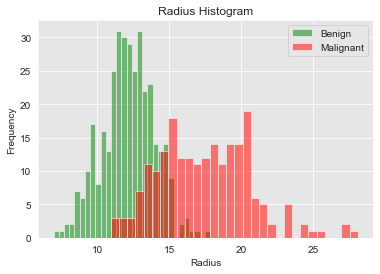

In [10]:
cancerData[cancerData['diagnosis']==0]['radius_mean'].hist(bins=30,color='green', alpha = .5, label='Benign')
cancerData[cancerData['diagnosis']==1]['radius_mean'].hist(bins=30,color='red', alpha = .5, label='Malignant')
plt.legend()
plt.title('Radius Histogram')
plt.xlabel('Radius')
plt.ylabel('Frequency')


<h1 id="Linear-Regression-of-Data">Linear Regression of Data<a class="anchor-link" href="#Linear-Regression-of-Data">¶</a></h1>



<p><strong>Set up Arrays</strong></p>


In [11]:
#X = cancerData.drop(['diagnosis'],axis=1)
#This data makes the most effective predictors (most correlation with diagnosis)
X = cancerData[['concave points_mean','concave points_worst','radius_mean','radius_worst','perimeter_mean','perimeter_worst']]
y = cancerData['diagnosis']
X.head()

,concave points_mean,concave points_worst,radius_mean,radius_worst,perimeter_mean,perimeter_worst
0,0.14710,0.2654,17.99,25.38,122.80,184.60
1,0.07017,0.1860,20.57,24.99,132.90,158.80
2,0.12790,0.2430,19.69,23.57,130.00,152.50
3,0.10520,0.2575,11.42,14.91,77.58,98.87
4,0.10430,0.1625,20.29,22.54,135.10,152.20



<p><strong>Train</strong></p>


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()


<p><strong>Coefficients</strong></p>


In [13]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
concave points_mean,2.455707
concave points_worst,3.527108
radius_mean,0.075831
radius_worst,0.110228
perimeter_mean,-0.018038
perimeter_worst,-0.007881



<p><strong>Make predictions</strong></p>


Text(0, 0.5, 'Predicted Value')

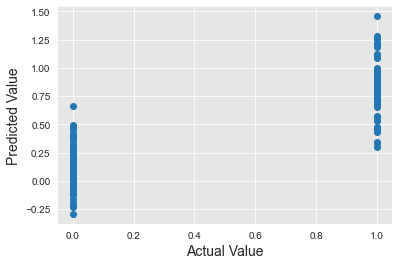

In [14]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.scatter(y_test,lm.predict(X_test))
plt.xlabel('Actual Value', fontsize=14)
plt.ylabel('Predicted Value', fontsize=14)

In [15]:
print(lm.predict(X_test)[:100])

[ 1.38094940e-01  1.99447797e-01  1.43866423e-01  5.70233391e-01
 -6.55664758e-02  7.28210564e-02  1.15596605e-01  1.12611498e+00
  5.25764889e-02  1.86132849e-01  8.92054029e-01  2.01418868e-01
  3.06873232e-01 -1.03299142e-01  7.15660571e-01 -5.32853301e-02
  1.83534364e-01  1.08274266e-01  1.25469702e+00  4.46385691e-01
  1.53719828e-01 -2.31736000e-01  1.03377204e-01  1.28844978e-01
  7.47562697e-01  8.28107334e-02  7.64873670e-01 -1.00569306e-01
  9.29254448e-01  7.91322298e-01  6.65998300e-01  7.24664332e-01
  2.74888433e-01  3.41714436e-01  2.12990278e-02 -6.68950409e-02
  5.30556902e-01  7.14289703e-01  7.92590310e-01  1.26252732e+00
  7.63609959e-01  2.67266572e-01 -1.48297571e-02  3.18394882e-01
 -2.23446842e-01  9.04028147e-02  9.75456898e-01  3.84066420e-01
  4.71217493e-01  2.89881208e-02  7.53525861e-01  1.98544966e-01
  4.71054512e-02  1.21586195e+00 -2.32274366e-02  4.71457913e-02
  9.22252768e-01  9.35484743e-01  1.72006115e-01 -1.02760371e-02
  8.44577770e-01  4.67988


<p><strong>Residual Histogram</strong></p>


Text(0.5, 0, 'Diagnosis')

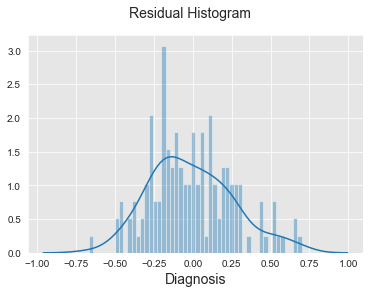

In [16]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
graph = sns.distplot((y_test-lm.predict(X_test)),bins=50)
plt.suptitle('Residual Histogram', fontsize=14)
plt.xlabel('Diagnosis', fontsize=14)


<p><strong>Check Error</strong></p>


In [17]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lm.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lm.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test))))

Mean Absolute Error: 0.2154583896430061
Mean Squared Error: 0.07065221104496541
Root Mean Squared Error: 0.2658048363836998



<h2 id="First-Categorical-Technique:-Logistic-Regression">First Categorical Technique: Logistic Regression<a class="anchor-link" href="#First-Categorical-Technique:-Logistic-Regression">¶</a></h2>


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel = LogisticRegression()

In [22]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [23]:
predictions = logmodel.predict(X_test)
predictions[:200]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

<AxesSubplot:xlabel='diagnosis'>

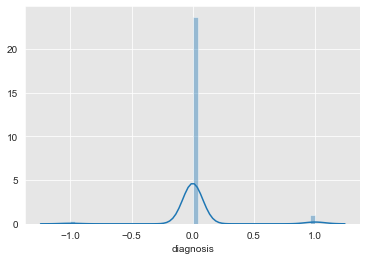

In [24]:
sns.distplot((y_test-logmodel.predict(X_test)),bins=50)

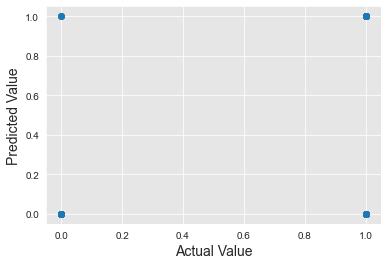

In [25]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.xlabel('Actual Value', fontsize=14)
plt.ylabel('Predicted Value', fontsize=14)
plt.scatter(y_test,logmodel.predict(X_test))

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       105
           1       0.97      0.89      0.93        66

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [27]:
print(confusion_matrix(y_test,predictions))

[[103   2]
 [  7  59]]



<h2 id="Second-Categorical-Technique:-SVMs">Second Categorical Technique: SVMs<a class="anchor-link" href="#Second-Categorical-Technique:-SVMs">¶</a></h2>


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
from sklearn.svm import SVC

In [31]:
model = SVC()

In [32]:
model.fit(X_train,y_train)

SVC()

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
predictions = model.predict(X_test)
predictions[:200]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

<AxesSubplot:xlabel='diagnosis'>

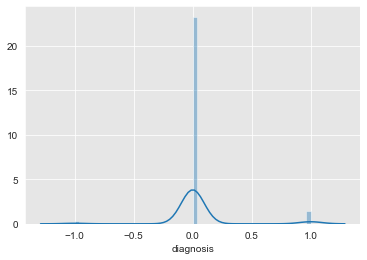

In [35]:
sns.distplot((y_test-model.predict(X_test)),bins=50)

Text(0, 0.5, 'Predicted Value')

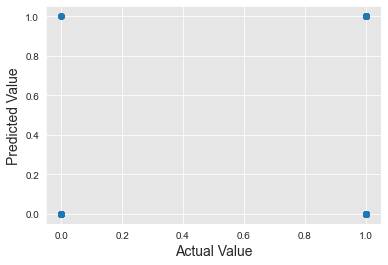

In [36]:
plt.scatter(y_test,model.predict(X_test))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.xlabel('Actual Value', fontsize=14)
plt.ylabel('Predicted Value', fontsize=14)

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        89
           1       0.96      0.85      0.90        54

    accuracy                           0.93       143
   macro avg       0.94      0.91      0.92       143
weighted avg       0.93      0.93      0.93       143



In [38]:
print(confusion_matrix(y_test,predictions))

[[87  2]
 [ 8 46]]



<h2 id="Third-Categorical-Technique:-Decision-Tree">Third Categorical Technique: Decision Tree<a class="anchor-link" href="#Third-Categorical-Technique:-Decision-Tree">¶</a></h2>


In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtree = DecisionTreeClassifier()

In [41]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
predict = dtree.predict(X_test)
predict[:200]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

<AxesSubplot:xlabel='diagnosis'>

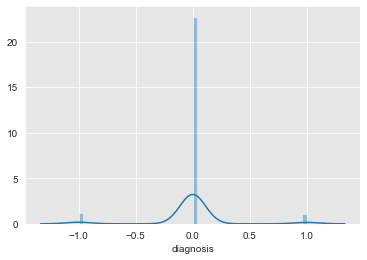

In [44]:
sns.distplot((y_test-dtree.predict(X_test)),bins=50)

Text(0, 0.5, 'Predicted Value')

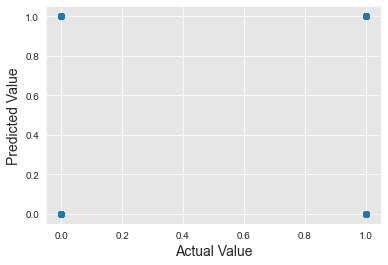

In [45]:
plt.scatter(y_test,dtree.predict(X_test))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.xlabel('Actual Value', fontsize=14)
plt.ylabel('Predicted Value', fontsize=14)

In [46]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93        89
           1       0.87      0.89      0.88        54

    accuracy                           0.91       143
   macro avg       0.90      0.91      0.90       143
weighted avg       0.91      0.91      0.91       143



In [47]:
print (confusion_matrix(y_test,predict))

[[82  7]
 [ 6 48]]
